In [129]:
import pandas as pd 

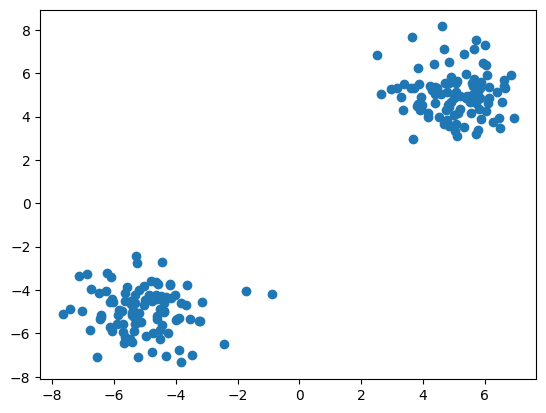

In [130]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]
X,y = make_blobs(n_samples=200,centers=centroids,cluster_std=cluster_std,n_features=2,random_state=2)
plt.scatter(X[:,0],X[:,1])

In [137]:
X

array([[ 5.93188736,  6.46833213],
       [ 6.38378103,  5.14834924],
       [-5.18946926, -5.07721867],
       [-5.1144213 , -5.49817419],
       [ 3.90070269,  4.31846936],
       [ 4.83283123,  4.42338907],
       [-4.24803515, -5.99376098],
       [-5.3135082 , -4.22898826],
       [ 3.93863426,  4.89148318],
       [-4.61813377, -4.43372456],
       [ 6.0858064 ,  5.9021794 ],
       [ 6.11064528,  4.62666119],
       [ 4.1500045 ,  4.1476582 ],
       [ 5.08536443,  5.66533428],
       [ 4.52001489,  3.9803509 ],
       [-3.89085672, -6.76491773],
       [-6.09873895, -3.41551294],
       [ 6.93315697,  3.92920367],
       [ 5.3359084 ,  6.90437591],
       [-5.26905696, -2.76863321],
       [-7.65944946, -5.09145262],
       [ 4.68430679,  3.6499979 ],
       [ 6.64191464,  5.31169771],
       [-5.74787095, -4.99097475],
       [ 5.8695982 ,  3.91290943],
       [ 2.97663606,  5.26797258],
       [ 4.38162451,  5.37879447],
       [-3.16466728, -4.55931013],
       [ 6.14485538,

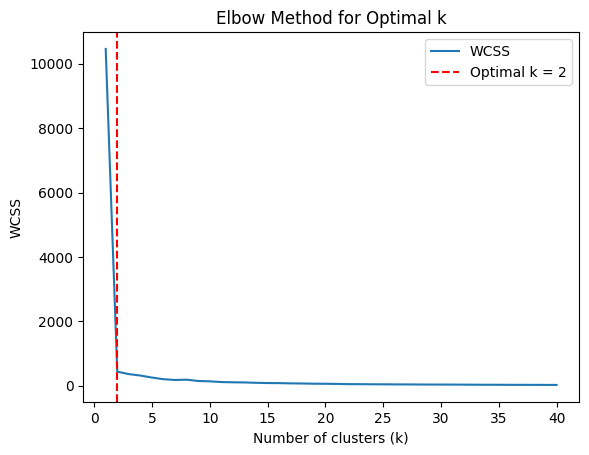

The optimal number of clusters is: 2


In [131]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate WCSS for each k from 1 to 40
wcss = []
for i in range(1, 41):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit_predict(X)
    wcss.append(km.inertia_)

# Function to detect the elbow point based on the rate of slope decrease
def find_elbow_point(wcss):
    wcss_diff = np.diff(wcss)  # First derivative: difference between consecutive WCSS values
    wcss_diff_norm = np.abs(wcss_diff / wcss_diff.max())  # Normalize the slope values
    
    # Find the elbow where slope starts to decrease less significantly
    elbow_index = np.argmax(wcss_diff_norm < 8) + 1  # Threshold of 0.2 for slope change, +1 to match original index
    return elbow_index

# Automatically find the elbow point
optimal_k = find_elbow_point(wcss)

# Plot the WCSS graph and mark the elbow point
plt.plot(range(1, 41), wcss, label='WCSS')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

print(f"The optimal number of clusters is: {optimal_k}")


In [132]:
import random
import numpy as np

In [133]:
class KMeansCluster:
    def __init__(self,n_clusters):
        self.n_clusters=n_clusters
        
        self.cetroids =None
    def fit(self,X):
        index =random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids =X[index]
        # print(self.centroids)
        for i in range(1000):
            clusters = self.assign_cluster(X)
            old_centroids = self.centroids
            # print(old_centroids)
            new_centroids =self.move_centroids(X,clusters)
            # print(new_centroids)
            if (old_centroids == new_centroids).all():
                break
        return clusters
    

    
    def move_centroids(self,X,clusters):
        cluster_types = np.unique(clusters)
        centroids =[]
        for type in cluster_types:
            centroids.append(X[clusters == type].mean(axis=0))
        return np.array(centroids)


    def assign_cluster(self,X):
        distances =[]
        cluster_group=[]
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            # print("distance",distances)
            min_distance = min(distances)
            cluster_group.append(distances.index(min_distance))
            distances.clear()
        return np.array(cluster_group)
 
  

      


           

    

        



            
        

In [134]:
obj = KMeansCluster(2)
clusters = obj.fit(X)

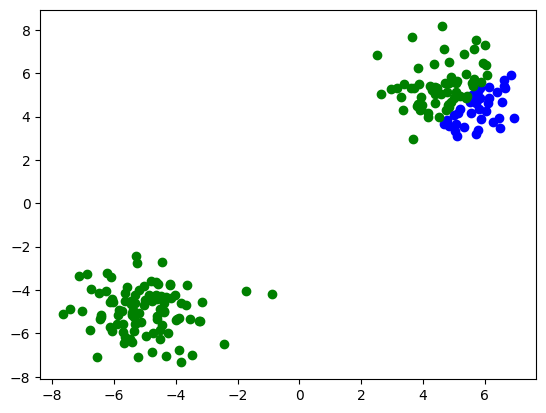

In [135]:
import matplotlib.pyplot as plt 
plt.scatter(X[clusters == 0,0],X[clusters==0,1],color='blue')
plt.scatter(X[clusters == 1,0],X[clusters==1,1],color='green')
plt.show()

In [136]:
from sklearn.metrics import silhouette_score
# The silhouette score ranges from -1 to 1, where higher values indicate better cluster separatio
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.19338120764007466
